# Analyzing Cryptocurrencies
 By Brian Phan

## Introduction

In this report, I will be analyzing the performance of Bitcoin, Ethereum, and Litecoin in relation to each other. The reason I chose these 4 to examine is based on history, market capitalization, and personal investments. I will be reviewing specifically the following topics:
- Market Capitalization
- Price to USD
- 30 day Return on Investment
- The current and future supply of crypto units

Data was gathered as CSVs from coinmetrics.io. on 05/14/2021.


## Data Wrangling

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Importing each CSV into DataFrames
btc = pd.read_csv('D:\Desktop\Analyzing Crypto\Datasets\BTC.csv')
eth = pd.read_csv('D:\Desktop\Analyzing Crypto\Datasets\ETH.csv')
ltc = pd.read_csv('D:\Desktop\Analyzing Crypto\Datasets\LTC.csv')
btc.head()

,date,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,...,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d
0,2009-01-03,0,0,0,0,0,0,0,0,0,...,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-04,0,0,0,0,0,0,0,0,0,...,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-05,0,0,0,0,0,0,0,0,0,...,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-06,0,0,0,0,0,0,0,0,0,...,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-07,0,0,0,0,0,0,0,0,0,...,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Cleaning and Assessing Data

These files have a lot of extra columsn and rows, so we will need to clean up the data to those that we need. We also want to keep the data recent from 2018. Specifically, the columns we will keep are:
- CapMrktCurUSD: The sum USD value of the current supply
- HashRate: The mean rate at which miners are solving hashes that interval. Hash rate is the speed at which computations are being completed across all miners in the network.
- PriceUSD: The fixed closing price of the asset denominated in USD
- ROI30d: The return on investment for the asset assuming a purchase 30 days prior.
- SplyCur: Suppy, current
- SplyExpFut10yr: Supply, future expected, next 10yr

In [4]:
# Selecting only the columns we need. Easier to filter than to drop since there's so many columns.
btc_filter = btc[['date','CapMrktCurUSD','HashRate','PriceUSD','ROI30d','SplyCur','SplyExpFut10yr' ]]
btc_clean = btc_filter[btc_filter['date'] > '2018']
btc_clean.head()

,date,CapMrktCurUSD,HashRate,PriceUSD,ROI30d,SplyCur,SplyExpFut10yr
3285,2018-01-01,2.258877e+11,1.492366e+07,13464.653612,23.135126,1.677635e+07,2.027413e+07
3286,2018-01-02,2.475552e+11,1.641554e+07,14754.322205,31.571229,1.677849e+07,2.027467e+07
3287,2018-01-03,2.518793e+11,1.507158e+07,15010.286160,29.822862,1.678045e+07,2.027516e+07
3288,2018-01-04,2.529181e+11,1.612755e+07,15070.300799,28.402629,1.678255e+07,2.027568e+07
3289,2018-01-05,2.852872e+11,1.372762e+07,16997.227408,21.477034,1.678434e+07,2.027613e+07


In [81]:
# Looks much better. We'll do the rest now:
eth_filter = eth[['date','CapMrktCurUSD','HashRate','PriceUSD','ROI30d','SplyCur','SplyExpFut10yr' ]]
eth_clean = eth_filter[eth_filter['date'] > '2018']

ltc_filter = ltc[['date','CapMrktCurUSD','HashRate','PriceUSD','ROI30d','SplyCur','SplyExpFut10yr' ]]
ltc_clean = ltc_filter[ltc_filter['date'] > '2018']

eth_clean.head()

,date,CapMrktCurUSD,HashRate,PriceUSD,ROI30d,SplyCur,SplyExpFut10yr
886,2018-01-01,7.312186e+10,132.723273,756.071766,64.414505,9.671286e+07,1.730100e+08
887,2018-01-02,8.356977e+10,128.089551,863.918308,86.034500,9.673342e+07,1.731686e+08
888,2018-01-03,9.130175e+10,122.109164,943.648126,102.109073,9.675402e+07,1.733003e+08
889,2018-01-04,9.216409e+10,119.658817,952.354544,107.902872,9.677498e+07,1.737226e+08
890,2018-01-05,9.278399e+10,119.500374,958.552846,120.745845,9.679590e+07,1.741271e+08


In [6]:
btc_clean.describe()

,CapMrktCurUSD,HashRate,PriceUSD,ROI30d,SplyCur,SplyExpFut10yr
count,1.229000e+03,1.229000e+03,1229.000000,1229.000000,1.229000e+03,1.229000e+03
mean,2.371042e+11,8.314952e+07,13034.305571,6.067663,1.786854e+07,2.044968e+07
std,2.518563e+11,4.482353e+07,13387.836104,24.616111,5.863986e+05,8.494381e+04
min,5.549965e+10,1.372762e+07,3185.074044,-59.952601,1.677635e+07,2.027413e+07
25%,1.151492e+11,4.331167e+07,6664.024094,-9.746959,1.735982e+07,2.038188e+07
50%,1.568927e+11,8.061288e+07,8800.959087,2.773995,1.792173e+07,2.045211e+07
75%,1.976458e+11,1.190570e+08,11074.103680,22.616785,1.842917e+07,2.052234e+07
max,1.185279e+12,1.986245e+08,63445.638314,120.666959,1.870932e+07,2.059238e+07


## Data Analysis

Let's plot the price of the crypto currencies since 2018:

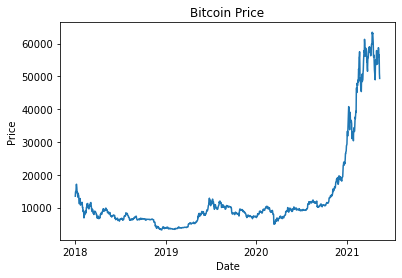

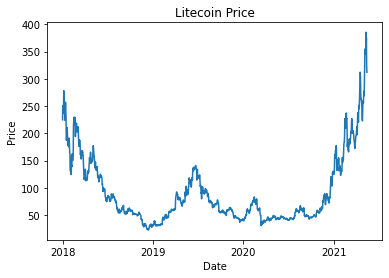

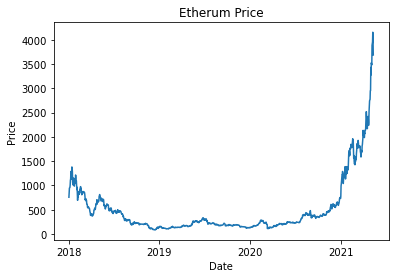

In [31]:
plt.plot(btc_clean['date'],btc_clean['PriceUSD'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Price')
plt.xticks(['2018-01-01','2019-01-01','2020-01-01','2021-01-01'],['2018','2019','2020','2021'])
plt.show()

plt.plot(ltc_clean['date'],ltc_clean['PriceUSD'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Litecoin Price')
plt.xticks(['2018-01-01','2019-01-01','2020-01-01','2021-01-01'],['2018','2019','2020','2021'])
plt.show()

plt.plot(eth_clean['date'],eth_clean['PriceUSD'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Etherum Price')
plt.xticks(['2018-01-01','2019-01-01','2020-01-01','2021-01-01'],['2018','2019','2020','2021'])
plt.show()

The plot shows that buying and holding Bitcoin and Etherum before 2021 would give you massive returns, but not so much with Litecoin, depending on when you bought it. What would the performance be for someone who was an active trader in crypto currencies? Conveniently, there is a data column for this, labeled 'ROI30d', which is the Return on Investment when an asset is bought 30 days prior. Let's plot that:

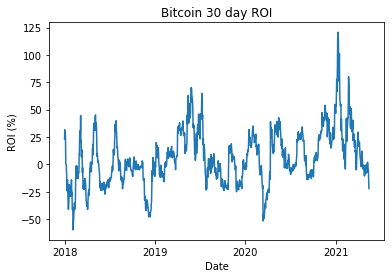

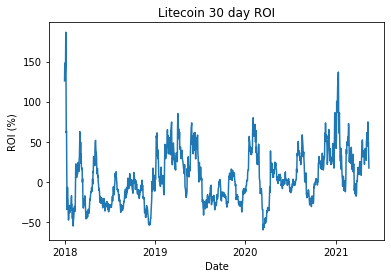

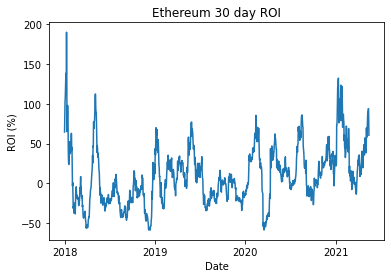

In [92]:
plt.plot(btc_clean['date'],btc_clean['ROI30d'])
plt.xlabel('Date')
plt.ylabel('ROI (%)')
plt.title('Bitcoin 30 day ROI')
plt.xticks(['2018-01-01','2019-01-01','2020-01-01','2021-01-01'],['2018','2019','2020','2021'])
plt.show()

plt.plot(ltc_clean['date'],ltc_clean['ROI30d'])
plt.xlabel('Date')
plt.ylabel('ROI (%)')
plt.title('Litecoin 30 day ROI')
plt.xticks(['2018-01-01','2019-01-01','2020-01-01','2021-01-01'],['2018','2019','2020','2021'])
plt.show()

plt.plot(eth_clean['date'],eth_clean['ROI30d'])
plt.xlabel('Date')
plt.ylabel('ROI (%)')
plt.title('Ethereum 30 day ROI')
plt.xticks(['2018-01-01','2019-01-01','2020-01-01','2021-01-01'],['2018','2019','2020','2021'])
plt.show()

In [96]:
btc_clean['ROI30d'].describe()

count    1229.000000
mean        6.067663
std        24.616111
min       -59.952601
25%        -9.746959
50%         2.773995
75%        22.616785
max       120.666959
Name: ROI30d, dtype: float64

In [95]:
ltc_clean['ROI30d'].describe()

count    1229.000000
mean        5.498043
std        32.507170
min       -60.152157
25%       -19.415486
50%         0.894898
75%        27.736798
max       186.676683
Name: ROI30d, dtype: float64

In [97]:
eth_clean['ROI30d'].describe()

count    1229.000000
mean        9.484069
std        35.963077
min       -58.364164
25%       -16.172647
50%         4.227763
75%        29.179839
max       189.609205
Name: ROI30d, dtype: float64

Based on the plots and statistical data, there is massive volatility in these cryptocurrencies. While one may not make any profit when buying and holding Litecoin above $150, there was a lot of money to be made actively trading Litecoin, with many occurances of an ROI above 50% between 2018 and 2021.

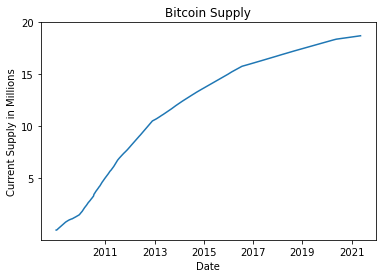

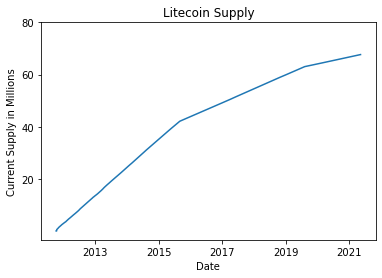

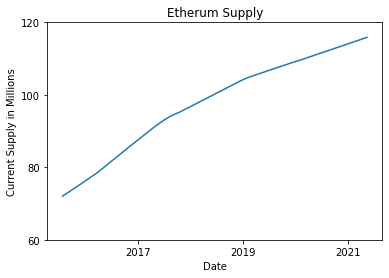

In [80]:
plt.plot(btc['date'],btc['SplyCur'])
plt.xlabel('Date')
plt.ylabel('Current Supply in Millions')
plt.title('Bitcoin Supply')
plt.xticks(['2011-01-01','2013-01-01','2015-01-01','2017-01-01','2019-01-01','2021-01-01'],['2011','2013','2015','2017','2019','2021'])
plt.yticks([5000000, 10000000,15000000,20000000],[5,10,15,20])
plt.show()

plt.plot(ltc['date'],ltc['SplyCur'])
plt.xlabel('Date')
plt.ylabel('Current Supply in Millions')
plt.title('Litecoin Supply')
plt.xticks(['2013-01-01','2015-01-01','2017-01-01','2019-01-01','2021-01-01'],['2013','2015','2017','2019','2021'])
plt.yticks([20000000, 40000000,60000000,80000000],[20,40,60,80])
plt.show()

plt.plot(eth['date'],eth['SplyCur'])
plt.xlabel('Date')
plt.ylabel('Current Supply in Millions')
plt.title('Etherum Supply')
plt.xticks(['2017-01-01','2019-01-01','2021-01-01'],['2017','2019','2021'])
plt.yticks([60000000, 80000000,100000000,120000000],[60,80,100,120])
plt.show()

## Conclusions